# IBM HR Analytics Employee Attrition & Performance


### Business Understanding

IBM is a global technology and consulting firm that operates in a highly competitive and dynamic market. Effective human capital management is critical for sustaining market leadership and meeting business objectives. Employee attrition and performance are critical factors in determining organisational success. High turnover rates can disrupt team dynamics, increase recruitment and training costs, and potentially limit innovation and productivity. In contrast, retaining top performers and effectively managing employee performance can boost business growth and operational efficiency.


### Problem Statement
IBM, a global leader in technology and consulting, is facing challenges related to employee attrition and performance management.  Despite having extensive data on employee demographics, performance, compensation, and job satisfaction, the company lacks a comprehensive understanding of the factors driving attrition and how performance metrics correlate with employee retention. The existing HR analytics tools and methodologies may not fully capture or analyze the complex relationships between these variables.

### Objectives
Objective:

The primary objective is to analyze the available HR data to uncover insights into the factors driving employee attrition and performance at IBM. By leveraging this data, the project aims to:

. Identify key drivers of attrition across different segments of the workforce.

. Understand the relationship between employee performance metrics and attrition rates.

. Assess the impact of work environment factors on retention and job satisfaction.

. Create predictive models to anticipate future attrition trends and support proactive HR interventions.

### Data Understanding
The IBM HR Analytics dataset used in the analysis includes various employee-related attributes aimed at understanding factors influencing employee attrition and performance. The dataset contains features such as age, gender, job role, department, daily rate, distance from home, education level, job satisfaction, work-life balance, and monthly income. The objective is to analyze these factors to identify key drivers of attrition, understand the impact of work environment and performance on retention, and develop predictive models to anticipate future attrition trends.

## Importing Libraries

In [266]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

## Loading the Dataset

In [267]:
#Read Data
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [268]:
#Get the dimensions of the data.
data.shape

(1470, 35)

## Statistical Summary of the Dataset

To gain insights into the numerical features of the dataset, we use the `data.describe()` method. This function provides a statistical summary of the dataset, including:

- **Count**: The number of non-null entries.
- **Mean**: The average value.
- **Standard Deviation**: The spread of the data points.
- **Minimum**: The smallest value.
- **25th, 50th, and 75th Percentiles**: The quartiles of the data.
- **Maximum**: The largest value.


In [269]:
#Get the summary.
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Display of the first and the last rows

In [270]:
#Print the first 5 rows 
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [271]:
#last 5 rows
data.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [272]:
 #retrieving and displays the first five values from the `MonthlyIncome` column in the dataset. 
data['MonthlyIncome'].head()


0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

#d.	Explore the data types of each column
data.dtypes

In [273]:

data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Analyzing the attrition column

In [274]:
data.dropna(axis=0, inplace=True)

removing any rows from the dataset that contain missing values

In [275]:
#checking shape Get the dimensions of the data.
data.shape

(1470, 35)

In [276]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

returns the number of unique values for each column in the dataset. 

In [277]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing data in this dataset.

## Data Analysis

### EDA

#### Attrition vs Overtime

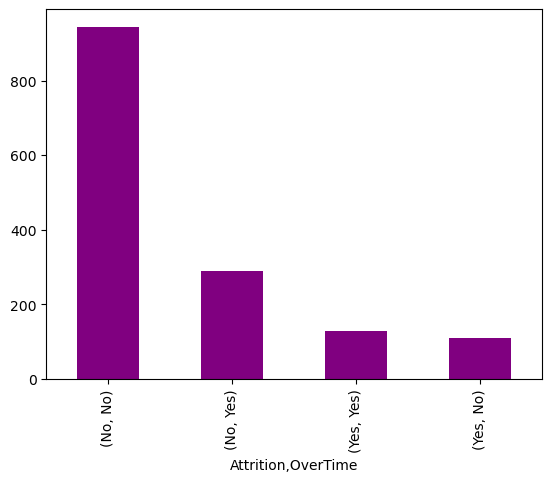

In [278]:
data.groupby('Attrition').OverTime.value_counts().sort_values(ascending = False).plot(kind = 'bar',color = 'purple')
plt.show()

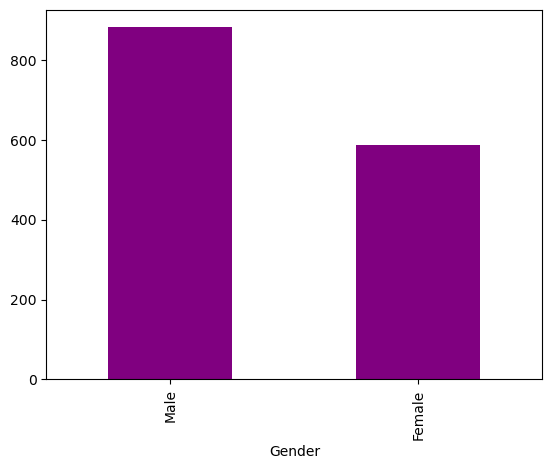

In [279]:
data['Gender'].value_counts().plot(kind = 'bar',color = 'purple')
plt.show()

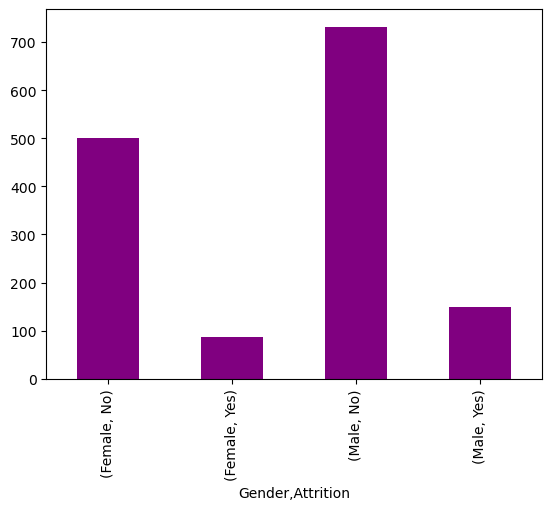

In [280]:
data.groupby('Gender').Attrition.value_counts().plot( kind = 'bar',color = 'purple')
plt.show()

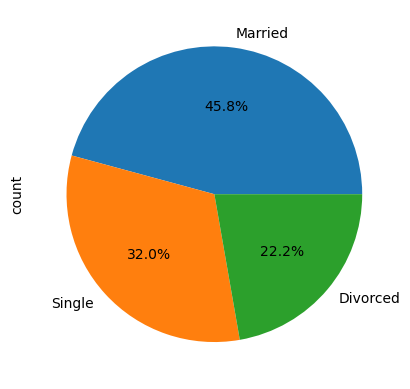

In [281]:
data['MaritalStatus'].value_counts().plot(kind = 'pie' , autopct = "%1.1f%%")
plt.show()

#### Marital Status vs Attrition

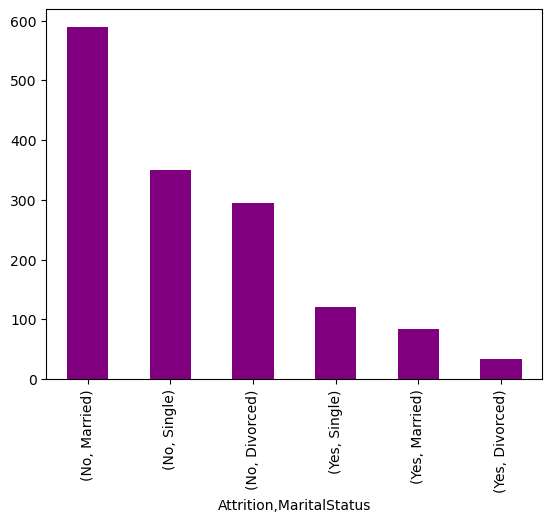

In [282]:
data.groupby('Attrition').MaritalStatus.value_counts().plot(kind = "bar",color = 'purple')
plt.show()

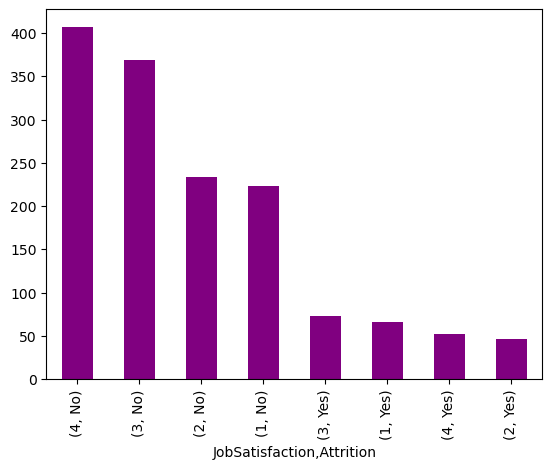

In [283]:
data.groupby('JobSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar",color = 'purple')
plt.show()

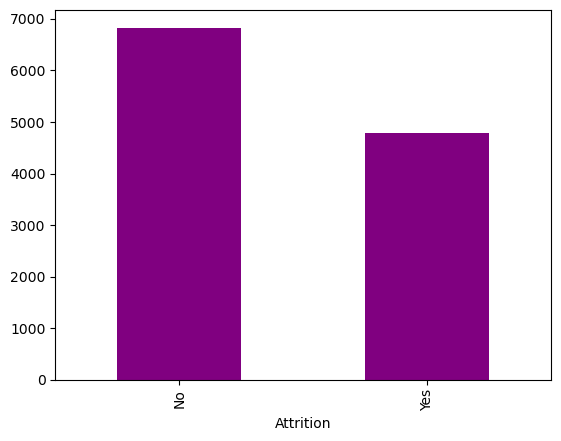

In [284]:
data.groupby('Attrition')['MonthlyIncome'].mean().plot(kind = "bar",color = 'purple')
plt.show()
# Those who earn less are more likely to leave the company

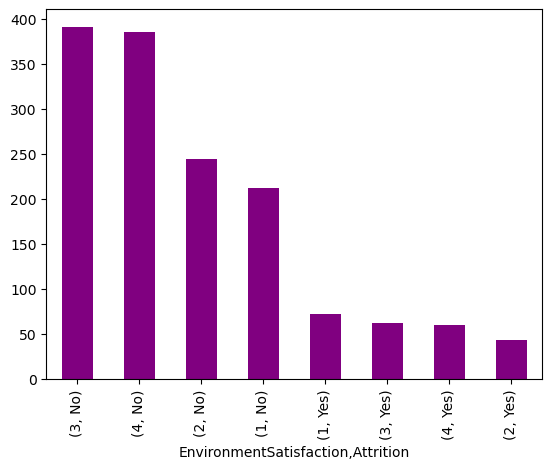

In [285]:
data.groupby('EnvironmentSatisfaction').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar",color = 'purple')
plt.show()

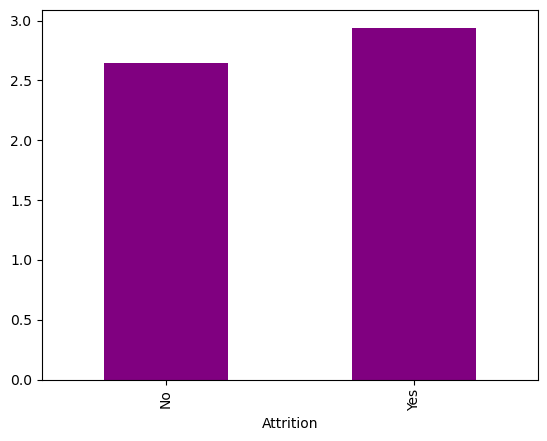

In [286]:
data.groupby('Attrition')['NumCompaniesWorked'].mean().plot(kind = "bar",color = 'purple')
plt.show()
# Those who have worked in more places are more likely to leave the company

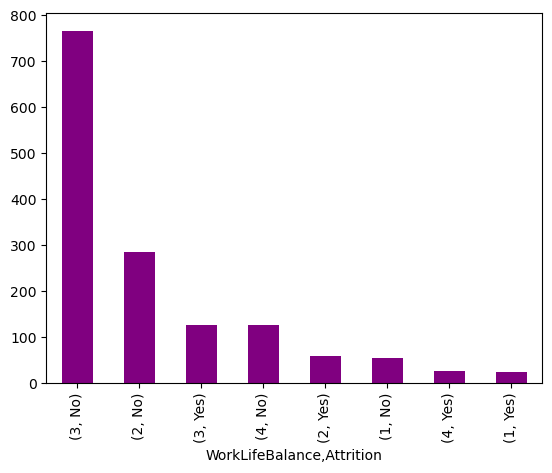

In [287]:
data.groupby('WorkLifeBalance').Attrition.value_counts().sort_values(ascending = False).plot(kind = "bar",color = 'purple')
plt.show()

In [288]:
#Create an array of all the numeric datatypes. Similarly, create an array of all categorical datatypes
num_cols=['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear']

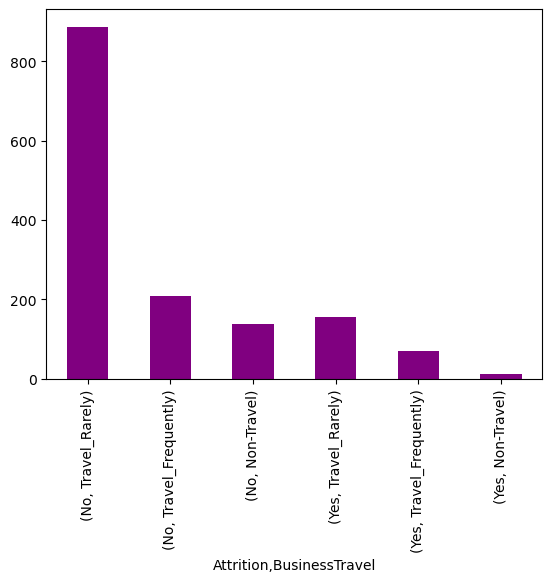

In [289]:
data.groupby('Attrition')['BusinessTravel'].value_counts().plot(kind ='bar' ,color = 'purple')
plt.show()

The above shows the list of the numeric columns

In [290]:
#Create an array of all the numeric datatypes. Similarly, create an array of all categorical datatypes
cat_cols = ['Attrition','BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18','OverTime']
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

The above shows the list of the categorical columns

In [291]:
#we are removing ID since it has all the unique values which means number of rows is equal to number of unique values of ID
#Remove the ‘EmployeeNumber’ column. Verify with the head command whether you have removed from the original dataframe.
data.drop(["EmployeeNumber"], axis = 1, inplace=True)

In [292]:
data['Attrition_ind'] = 0 
data.loc[data['Attrition'] =='Yes', 'Attrition_ind'] = 1

In [293]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,0


In [294]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,80,0,17,3,2,9,6,0,8,0
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,...,80,0,6,3,4,4,3,1,2,0


In [295]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [296]:
#Verify if there are any null values in each of the columns. (don’t impute now).
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [297]:
#Now, Create X and y from the original data-frame
y=data.loc[:, "Attrition"]
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [298]:
#Now, Create X and y from the original data-frame
X= data.loc[:,data.columns!='Attrition']
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,80,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,80,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,80,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,80,0,17,3,2,9,6,0,8,0


In [299]:
# loading data
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [300]:
#Apply train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 122)

In [301]:
#Attrition Value Counts

data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [302]:
#Observe the target variable proportion of the target.
data['Attrition'].value_counts()/len(ibm)*100

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

In [303]:
#Observe the target variable proportion of the target.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176,)
(294,)


In [304]:
X_train.shape[1]

34

In [305]:
y_train.value_counts()

Attrition
No     983
Yes    193
Name: count, dtype: int64

In [306]:
#similar for above code
data['Attrition'].value_counts() / ibm.shape[0] * 100

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

In [307]:
print(y_train.value_counts()/X_train.shape[0])

Attrition
No     0.835884
Yes    0.164116
Name: count, dtype: float64


In [308]:
print(y_test.value_counts()/X_test.shape[0])

Attrition
No     0.85034
Yes    0.14966
Name: count, dtype: float64


In [309]:
len(data)

1470

In [310]:
#Now, check the null values in train and test. See if all of them are Categorical or from Numeric datatypes.

In [311]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [312]:
#On the train, Separate the dataframe into numeric and categorical separately.
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear']

In [313]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [314]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [315]:
#Use Imputer function from sklearn to impute all the null values. (Seperately for Numeric and Categorical datatypes).

In [316]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [317]:
import warnings
warnings.filterwarnings("ignore")

In [318]:
linear_svm = SVC(kernel='linear', C=1, random_state=0)

In [319]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False


In [320]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,0


In [321]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [322]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [323]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,0


In [324]:
# One Hot Encoding
data = pd.get_dummies(ibm)
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_ind', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gend

In [325]:
dt_main=data.drop(['EmployeeCount','Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
dt_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,True,False,False,False,True,False,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,True,False,False,False,True,False,True,False
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,False,True,False,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,True,False,False,False,True,False,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,False,True,False,True,False


In [326]:
dt_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'Jo

In [327]:
dt_main['Attrition']=dt_main['Attrition_ind']
dt_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,True,False,False,False,True,False,True,1
1,49,279,8,1,3,61,2,2,2,5130,...,False,True,False,False,False,True,False,True,False,0
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,True,False,True,1
3,33,1392,3,4,4,56,3,1,3,2909,...,False,True,False,False,False,True,False,False,True,0
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,True,False,True,False,0


In [328]:
dt_main=dt_main.drop(['Attrition_ind'],axis=1)
dt_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [329]:
X=dt_main.drop('Attrition',axis=1)
y=dt_main.Attrition

In [330]:
features_label = dt_main.columns[:-1]

### Fitting Random Forest Classification to the Training set


In [331]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.068787
 2) DailyRate                      0.058087
 3) DistanceFromHome               0.050395
 4) Education                      0.047892
 5) EnvironmentSatisfaction        0.046385
 6) HourlyRate                     0.044061
 7) JobInvolvement                 0.043066
 8) JobLevel                       0.041470
 9) JobSatisfaction                0.034565
10) MonthlyIncome                  0.032825
11) MonthlyRate                    0.032558
12) NumCompaniesWorked             0.031942
13) PercentSalaryHike              0.030133
14) PerformanceRating              0.029651
15) RelationshipSatisfaction       0.028564
16) StockOptionLevel               0.028015
17) TotalWorkingYears              0.027299
18) TrainingTimesLastYear          0.024223
19) WorkLifeBalance                0.024184
20) YearsAtCompany                 0.023405
21) YearsInCurrentRole             0.022142
22) YearsSinceLastPromotion        0.021940
23) YearsWithCurrManager        

### Splitting into Train and Test Set


In [332]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 0)

### standardizing the range of features in the dataset

In [333]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [334]:
## DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2,  min_samples_leaf=1,random_state=42) 
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['DecisionTree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.836735,0.52381,0.22449,0.314286


This DataFrame provides the accuracy, precision, recall, and F1 score for the Decision Tree model, offering insights into its classification performance on the test data.




## Conclusion
Model Performance Summary:

Accuracy: 83.67%
Precision: 52.38%
Recall: 22.45%
F1 Score: 31.43%
### 1. Overall Accuracy:

The Decision Tree model has a high accuracy of 83.67%, indicating that it performs well in correctly predicting both attrition and non-attrition cases overall.
### 2. Precision:

With a precision of 52.38%, the model is moderately effective at identifying instances of attrition when it predicts them. This means that about half of the instances flagged as attrition are true positives. However, there is a considerable proportion of false positives, where the model incorrectly labels non-attrition cases as attrition.
### 3. Recall:

The recall of 22.45% is relatively low, indicating that the model identifies only a small fraction of actual attrition cases. This suggests that many employees who are likely to leave are not being flagged by the model, which could be problematic if the goal is to proactively address potential attrition.
### 4. F1 Score:

The F1 Score of 31.43% reflects a balance between precision and recall, but the low score highlights that the model struggles to effectively capture the positive cases (attrition) while maintaining a reasonable level of precision.
Implications
Attrition Identification: The model's ability to identify attrition is limited, as evidenced by the low recall. This means the organization may be missing many potential cases of employee attrition, which could affect planning and retention strategies.

## Recommendations:

### Improve Recall: 
Focus on improving the model's recall to ensure that more actual attrition cases are identified. This can be achieved by addressing class imbalance, adjusting the classification threshold, and exploring advanced models.
### Feature Engineering: 
Enhance the feature set to better capture the factors contributing to attrition. This could involve adding new features or refining existing ones based on domain knowledge.
### Model Enhancement:
Consider experimenting with different algorithms and hyperparameter tuning to improve the model's performance metrics.
## Strategic Recommendations:

### Proactive Measures:
Implement strategies to address the factors contributing to attrition more effectively, using insights gained from refining the model.
### Advanced Techniques:
Explore ensemble methods or other machine learning techniques to achieve better performance in predicting employee attrition.